In [1]:
import numpy as np
import scipy as sp
import random as rand
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
class room:
    def __init__(self, id):
        self.exits = []
        self.exitCt = 0
        self.id = id
    
    def toString(self):
        return "Room: %d Exct: %s Exits: %s" %(self.id,self.exitCt,self.exits)

In [3]:
testRoom = room(1)
print(testRoom.toString())

Room: 1 Exct: 0 Exits: []


In [4]:
def roomBuilder(rmList, rmCt):
    maxNeighbors = np.log(rmCt)
    
    for i in range(rmCt + 1):
        newRoom = room(i + 1)
        neighbor = rmList[rand.randint(0,i)]
        
        while (len(neighbor.exits) >= maxNeighbors):
            neighbor = rmList[rand.randint(0,i)]
        
        
        newRoom.exitCt += 1
        newRoom.exits.append(neighbor.id)
        if ((neighbor.exitCt > 1) and (rand.random() > 0.5)):
            loopRoom = neighbor.exits[rand.randint(0,len(neighbor.exits) -1)]
            newRoom.exitCt +=1
            newRoom.exits.append(loopRoom)
            rmList[loopRoom].exits.append(newRoom.id)
            rmList[loopRoom].exitCt += 1
            
        neighbor.exits.append(newRoom.id)
        neighbor.exitCt += 1
            
            
        
        rmList.append(newRoom)

    return rmList

In [5]:
rand.seed(1)

rmList = []
newRoom = room(0)
rmList.append(newRoom)
rmList = roomBuilder(rmList, 25)

for i in range(len(rmList)):
    print (rmList[i].toString())


Room: 0 Exct: 4 Exits: [1, 2, 4, 7]
Room: 1 Exct: 4 Exits: [0, 3, 6, 11]
Room: 2 Exct: 1 Exits: [0]
Room: 3 Exct: 4 Exits: [1, 5, 6, 11]
Room: 4 Exct: 2 Exits: [0, 10]
Room: 5 Exct: 3 Exits: [3, 12, 24]
Room: 6 Exct: 5 Exits: [3, 1, 8, 17, 23]
Room: 7 Exct: 4 Exits: [0, 9, 19, 21]
Room: 8 Exct: 3 Exits: [6, 14, 17]
Room: 9 Exct: 4 Exits: [7, 19, 21, 22]
Room: 10 Exct: 2 Exits: [4, 13]
Room: 11 Exct: 2 Exits: [3, 1]
Room: 12 Exct: 3 Exits: [5, 16, 24]
Room: 13 Exct: 1 Exits: [10]
Room: 14 Exct: 2 Exits: [8, 15]
Room: 15 Exct: 1 Exits: [14]
Room: 16 Exct: 2 Exits: [12, 18]
Room: 17 Exct: 4 Exits: [6, 8, 20, 23]
Room: 18 Exct: 1 Exits: [16]
Room: 19 Exct: 3 Exits: [7, 9, 22]
Room: 20 Exct: 1 Exits: [17]
Room: 21 Exct: 2 Exits: [7, 9]
Room: 22 Exct: 2 Exits: [9, 19]
Room: 23 Exct: 4 Exits: [17, 6, 25, 26]
Room: 24 Exct: 2 Exits: [5, 12]
Room: 25 Exct: 2 Exits: [23, 26]
Room: 26 Exct: 2 Exits: [23, 25]


In [6]:
G=nx.Graph()
listOfExits = []


for i in range(len(rmList)):
    G.add_node(i)
    listOfExits.append(rmList[i].exitCt)
    
for i in range(len(rmList)):
    for j in range(len(rmList[i].exits)):
        G.add_edge(i,rmList[i].exits[j])
    


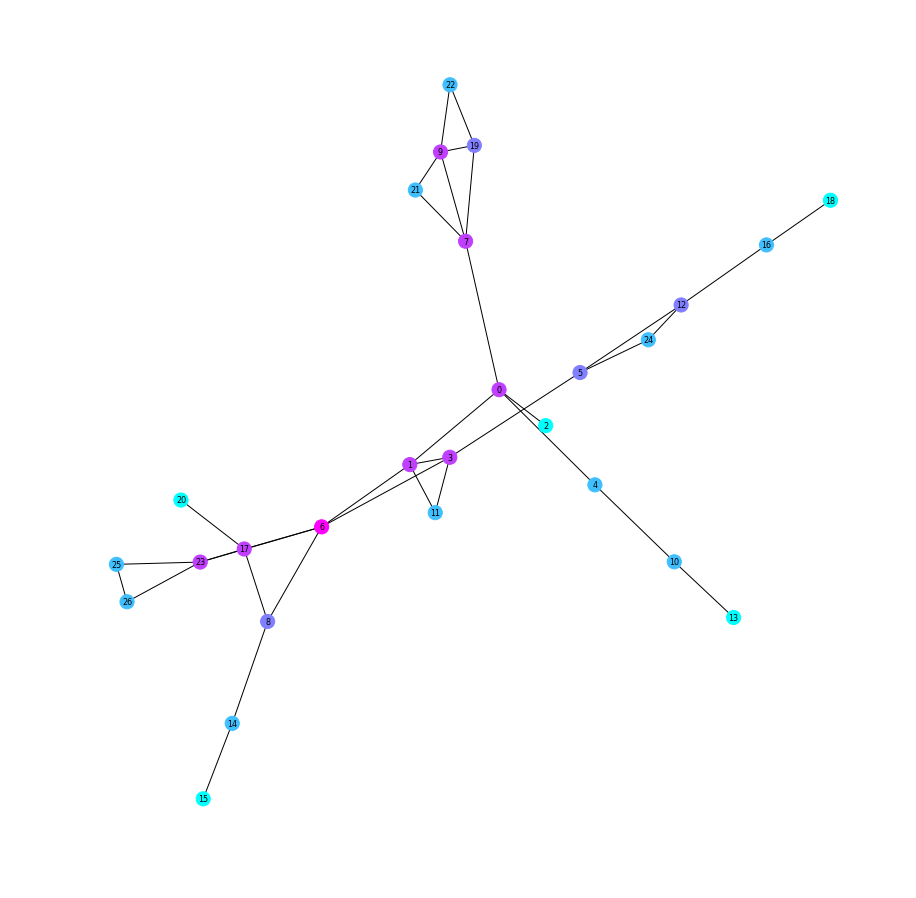

{0: array([ 14.24322074,  10.15337546]), 1: array([-8.85037945, -8.24880603]), 2: array([ 26.31136919,   1.32058967]), 3: array([ 1.50380175, -6.44954009]), 4: array([ 39.04765413, -13.2222126 ]), 5: array([ 35.19586661,  14.36997147]), 6: array([-31.66996835, -23.54832208]), 7: array([  5.5848709 ,  46.64034907]), 8: array([-45.64443481, -46.79791063]), 9: array([ -0.89300825,  68.57508954]), 10: array([ 59.59068928, -32.13742667]), 11: array([ -2.27086213, -20.05840787]), 12: array([ 61.35317881,  30.97968927]), 13: array([ 74.93693406, -45.82658115]), 14: array([-54.80031564, -71.83686126]), 15: array([-62.31173924, -90.38358557]), 16: array([ 83.43566973,  45.73038008]), 17: array([-51.69656433, -28.9925402 ]), 18: array([ 100.        ,   56.69761125]), 19: array([  7.85275681,  70.20082568]), 20: array([-68.06623729, -16.9606382 ]), 21: array([ -7.40968014,  59.2212871 ]), 22: array([  1.55093561,  85.08680434]), 23: array([-63.08097698, -32.20361741]), 24: array([ 52.86919775,  2

In [7]:
plt.set_cmap('cool')
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G,dim=2, iterations=100, scale= 100, center=(0,0))
nx.draw(G, node_size=200, with_labels=True, font_size=8, node_color=(listOfExits), pos=pos)
plt.show()
print(pos)

In [11]:
for i in range(len(pos)):
    tempstr = str(i) + ' ' + str(pos[i][0]) + ' ' + str(pos[i][1]) + ' ' + str(rmList[i].exits)
    print(tempstr)


0 14.2432207416 10.1533754605 [1, 2, 4, 7]
1 -8.85037945458 -8.24880602662 [0, 3, 6, 11]
2 26.3113691913 1.32058966502 [0]
3 1.5038017543 -6.44954009345 [1, 5, 6, 11]
4 39.0476541287 -13.2222126011 [0, 10]
5 35.1958666138 14.3699714682 [3, 12, 24]
6 -31.6699683499 -23.5483220802 [3, 1, 8, 17, 23]
7 5.58487089527 46.6403490706 [0, 9, 19, 21]
8 -45.644434805 -46.7979106265 [6, 14, 17]
9 -0.893008250546 68.5750895378 [7, 19, 21, 22]
10 59.5906892823 -32.1374266721 [4, 13]
11 -2.27086212572 -20.0584078713 [3, 1]
12 61.3531788127 30.9796892672 [5, 16, 24]
13 74.9369340571 -45.8265811549 [10]
14 -54.8003156372 -71.8368612552 [8, 15]
15 -62.3117392434 -90.3835855713 [14]
16 83.4356697333 45.7303800811 [12, 18]
17 -51.6965643333 -28.9925402049 [6, 8, 20, 23]
18 100.0 56.6976112544 [16]
19 7.8527568091 70.2008256835 [7, 9, 22]
20 -68.0662372896 -16.9606381997 [17]
21 -7.40968014062 59.2212870963 [7, 9]
22 1.55093560971 85.0868043365 [9, 19]
23 -63.0809769781 -32.2036174081 [17, 6, 25, 26]
24 52